In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

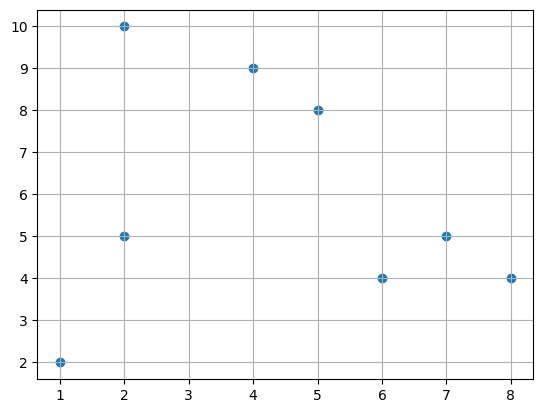

In [2]:
# Load data in X
datos = [
    (2, 10), # A
    (2, 5),  # B
    (8, 4),  # C
    (5, 8),  # D
    (7, 5),  # E
    (6, 4),  # F
    (1, 2),  # G
    (4, 9)   # H
]
X = np.array(datos)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

['y', 'b', 'g', 'r', 'c', 'm']


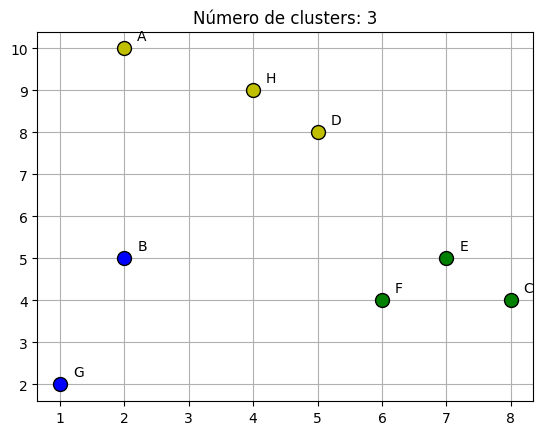

In [5]:
db = DBSCAN(eps=np.sqrt(10), min_samples=2, metric='euclidean').fit(X)  # Ajusta eps y min_samples
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Número de clusters en etiquetas, ignorando ruido si está presente.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r', 'c', 'm']  # Asegúrate de tener suficientes colores
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro usado para ruido.
        col = 'k'

    class_member_mask = (labels == k)

    # Puntos núcleo
    xy_core = X[class_member_mask & core_samples_mask]
    plt.plot(xy_core[:, 0], xy_core[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=10)  # Tamaño más grande para puntos núcleo

    # Puntos frontera
    xy_border = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy_border[:, 0], xy_border[:, 1], 's', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)  # Forma cuadrada para puntos frontera

# Agregar etiquetas con nombres de los puntos
point_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
for i, point in enumerate(X):
    plt.text(point[0] + 0.2, point[1] + 0.2, point_names[i], fontsize=10)

plt.title('Número de clusters: %d' % n_clusters_)
plt.grid(True)
plt.show()  